In [1]:
# view PE coeff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

In [3]:
import os
import tables
print(os.getcwd())
def findfile(radius):
    filename = '../coeff_pe/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.predict)[:]
    h.close()
    return coeff, expect, predict
coeff = [];
expect = [];
predict = [];
for i in np.arange(12,-12.2,-0.2):
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff = np.array(coeff)
radius = np.arange(12,-12.2,-0.2)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

/home/douwei/Recon1t/calib/Note


OSError: ``../coeff_pe/5kt_+12.00.h5`` does not exist

In [4]:
k1 = np.zeros((np.size(pe_coeff[0]),7))
radius = np.arange(12,-12.2,-0.2)
for i in np.arange(np.size(pe_coeff[0])):
    data = np.nan_to_num(pe_coeff[:,i])
    x = radius/12.2
    plt.plot(x, data)
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    index = (x<0.9) & (x>-0.9) & (x!=0)
    c = np.polynomial.legendre.legfit(x[index], data[index], 6)
    k1[i,:] = c
    plt.plot(x, np.polynomial.legendre.legval(x,c))

    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
    plt.show()
with h5py.File('../PE_coeff.h5','w') as out:
    out.create_dataset('coeff', data = k1)

NameError: name 'pe_coeff' is not defined

In [5]:
def findfile(radius):
    filename = '../coeff_time/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff
coeff = [];
for i in np.arange(12,-12,-0.2):
    file_str = '%+.2f' % i
    coeff.append(findfile(file_str))

time_coeff = np.array(coeff)
radius = np.arange(12,-12,-0.2)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')
plt.legend(range(5))
plt.show()

OSError: ``../coeff_time/5kt_+12.00.h5`` does not exist

In [6]:
import h5py
k1 = np.zeros((5,7))
radius = np.arange(12,-12,-0.2)
for i in np.arange(np.size(time_coeff[0])):
    data = np.nan_to_num(time_coeff[:,i])
    x = radius/12.2
    plt.plot(x, data)
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    c = np.polynomial.legendre.legfit(x, data, 6)
    k1[i,:] = c
    plt.plot(x, np.polynomial.legendre.legval(x,c))

    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
with h5py.File('../Time_coeff.h5','w') as out:
    out.create_dataset('coeff', data = k1)

NameError: name 'time_coeff' is not defined

In [7]:
# view fit pe goodness

def ReadPMT(geo):
    f = open(r'../PMT_' + geo + '.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    PMT_pos = PMT_pos[:,1:4]
    return PMT_pos
PMT_pos = ReadPMT('5kt')
vertex = np.array([0,0,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
for i in np.arange(0,121,5):
    plt.plot(cos_theta, expect[i],'.')
    plt.plot(cos_theta, predict[i])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0,0,%2.f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])
    plt.show()

IndexError: list index out of range

IndexError: list index out of range

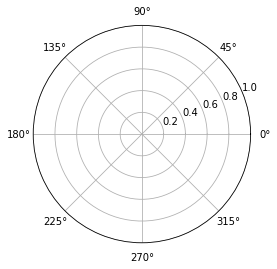

In [8]:
for i in np.arange(0,121,10):
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
    ax.plot(np.arccos(cos_theta), expect[i],'.')
    ax.plot(np.arccos(cos_theta), predict[i])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0, 0,%2.f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])
    plt.show()

IndexError: list index out of range

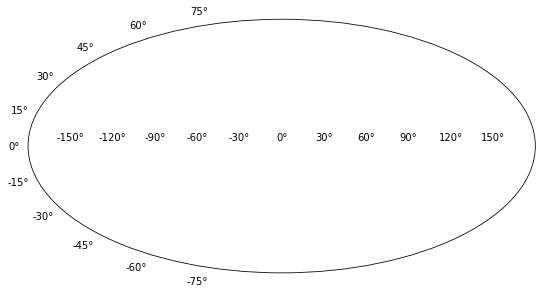

In [9]:
vertex = np.array([0,0,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
phi = np.arctan(PMT_pos[:,2]/(PMT_pos[:,1]+1e-3))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1,projection="aitoff")
plt.scatter(np.transpose(phi)*np.pi,cos_theta*np.pi/2,s=12, c=expect[40])
plt.colorbar()

In [10]:
i=5
plt.plot(cos_theta, expect[i],'.')
plt.plot(cos_theta, predict[i])
plt.xlabel('Cosine theta')
plt.ylabel('Mean photon')
plt.title('Generate position (0,0,%2.f) m' % (i*0.2-12))
plt.legend(['Mean hit','Predict hit'])
plt.show()

IndexError: list index out of range

In [11]:
# legendre spectrum
plt.plot(np.abs(coeff[15]))
plt.xlabel('order')
plt.ylabel('abs coeff')

IndexError: list index out of range

In [12]:
import os
import tables
def findfile(radius):
    filename = '../coeff_pe_1t_2.0MeV/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    #expect = np.array(h.root.mean)[:]
    #predict = np.array(h.root.predict)[:]
    h.close()
    #return coeff, expect, predict
    return coeff
coeff = [];
expect = [];
predict = [];
radius = np.arange(0.6001,-0.60,-0.01)
for i in radius:
    file_str = '%+.2f' % i
    #a1,a2,a3 = findfile(file_str)
    a1 = findfile(file_str)
    coeff.append(a1)
    #expect.append(a2)
    #predict.append(a3)
pe_coeff = np.array(coeff)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

OSError: ``../coeff_pe_1t_2.0MeV/file_+0.60.h5`` does not exist

In [13]:
import os
import tables
def findfile(radius):
    filename = '../coeff_pe_1t_2.0MeV/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff
coeff = [];
expect = [];
predict = [];
radius = np.arange(0.6001,-0.60,-0.01)
for i in radius:
    file_str = '%+.2f' % i
    #a1,a2,a3 = findfile(file_str)
    a1 = findfile(file_str)
    coeff.append(a1)
    #expect.append(a2)
    #predict.append(a3)
pe_coeff = np.array(coeff)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

N_max = 10
bd = 0.75
k1 = np.zeros((np.size(pe_coeff[0]),N_max+1))
k2 = np.zeros((np.size(pe_coeff[0]),N_max+1))
radius = np.arange(0.6001,-0.60,-0.01)
for i in np.arange(np.size(pe_coeff[0])):
    data = np.nan_to_num(pe_coeff[:,i])
    x = radius/0.65
    plt.plot(x, data,'.')
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    index1 = (x<=bd+1e-3) & (x>=-bd-1e-3) & (x!=0)
    weight = np.zeros_like(x[index1]) + 1e-3
    weight[0] = 0.1
    weight[-1] = 0.1
    c1 = np.polynomial.legendre.legfit(x[index1], data[index1], N_max, w=weight)
    k1[i,:] = c1
    
    index2 = (x>=bd-2e-2) | (x<=-bd+2e-2)
    weight = np.zeros_like(x[index2]) + 1e-3
    weight[np.int(np.size(weight)/2-1)] = 0.1
    weight[np.int(np.size(weight)/2)] = 0.1
    c2 = np.polynomial.legendre.legfit(x[index2], data[index2], N_max,w=weight)
    k2[i,:] = c2
    
    x_total = np.hstack((x[index1],x[index2]))
    y_total = np.hstack((np.polynomial.legendre.legval(x[index1],c1),np.polynomial.legendre.legval(x[index2],c2)))
    index = np.argsort(x_total)
    
    plt.plot(x_total[index],y_total[index])
    
    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
    plt.show()
with h5py.File('../PE_coeff_1t.h5','w') as out:
    out.create_dataset('coeff1', data = k1)
    out.create_dataset('coeff2', data = k2)

OSError: ``../coeff_pe_1t_2.0MeV/file_+0.60.h5`` does not exist

In [14]:
import os
import tables
from scipy.optimize import curve_fit
def findfile(radius):
    filename = '../coeff_time_1t_2.0MeV/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff

def odd_func(x, a, b, c, d, e):
    return a * x**1 + b * x**3 + c * x**5 + d * x**7 + e * x**9

def even_func(x, a, b, c, d, e):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8

coeff = [];
expect = [];
predict = [];
radius = np.arange(0.6001,-0.60,-0.01)
for i in radius:
    file_str = '%+.2f' % i
    #a1,a2,a3 = findfile(file_str)
    a1 = findfile(file_str)
    coeff.append(a1)
    #expect.append(a2)
    #predict.append(a3)
time_coeff = np.array(coeff)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

N_max = 10
bd = 0.75
k1 = np.zeros((np.size(time_coeff[0]),N_max+1))
k2 = np.zeros((np.size(time_coeff[0]),N_max+1))
radius = np.arange(0.6001,-0.60,-0.01)
for i in np.arange(np.size(time_coeff[0])):
    data = np.nan_to_num(time_coeff[:,i])
    x = radius/0.65
    plt.plot(x, data,'.')
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    index1 = (x<=bd+1e-3) & (x>=-bd-1e-3) & (x!=0)
    
    weight = np.zeros_like(x[index1]) + 1e-3
    weight[0] = 0.1
    weight[-1] = 0.1
    #c1 = np.polynomial.legendre.legfit(x[index1], data[index1], N_max, w=weight)
    
    x_end = x[index1][-1]
    x_start = x[index1][0]
    data_end = data[index1][-1]
    data_start = data[index1][0]
    #print(np.hstack((x[index1],x_end*np.ones(100),x_start*np.ones(100))))
    if(i%2==1):
        popt1, pcov = curve_fit(odd_func, np.hstack((x[index1],x_end*np.ones(100),x_start*np.ones(100))), \
                               np.hstack((data[index1],data_end*np.ones(100),data_start*np.ones(100))))
        output1 = odd_func(x[index1], *popt1)
        #plt.plot(x[index1], odd_func(x[index1], *popt), 'r-')
    else:
        popt1, pcov = curve_fit(even_func, np.hstack((x[index1],x_end*np.ones(100),x_start*np.ones(100))), \
                               np.hstack((data[index1],data_end*np.ones(100),data_start*np.ones(100))))
        #plt.plot(x[index1], even_func(x[index1], *popt), 'r-')
        output1 = even_func(x[index1], *popt1)
    #k1[i,:] = c1
    
    index2 = (x>=bd-2e-2) | (x<=-bd+2e-2)
    weight = np.zeros_like(x[index2]) + 1e-3
    weight[np.int(np.size(weight)/2-1)] = 0.1
    weight[np.int(np.size(weight)/2)] = 0.1
    #c2 = np.polynomial.legendre.legfit(x[index2], data[index2], N_max,w=weight)
    
    if(i%2==1):
        popt2, pcov = curve_fit(odd_func, np.hstack((x[index2],x_end*np.ones(100),x_start*np.ones(100))), \
                               np.hstack((data[index2],data_end*np.ones(100),data_start*np.ones(100))))
        #plt.plot(x[index2], odd_func(x[index2], *popt), 'r-')
        output2 = odd_func(x[index2], *popt2)
    else:
        popt2, pcov = curve_fit(even_func, np.hstack((x[index2],x_end*np.ones(100),x_start*np.ones(100))), \
                               np.hstack((data[index2],data_end*np.ones(100),data_start*np.ones(100))))
        output2 = even_func(x[index2], *popt2)
        #plt.plot(x[index2], even_func(x[index2], *popt), 'r-')
    #k2[i,:] = c2
    
    #x_total = np.hstack((x[index1],x[index2]))
    #y_total = np.hstack((np.polynomial.legendre.legval(x[index1],c1),np.polynomial.legendre.legval(x[index2],c2)))
    #index = np.argsort(x_total)
    x_total = np.hstack((x[index1],x[index2]))
    y_total = np.hstack((output1,output2))
    index = np.argsort(x_total)
    
    plt.plot(x_total[index],y_total[index])
    #plt.text(0,0.5,r'fit: z^1=%2.3f, z^3=%2.3f, z^5=%2.3f, z^7=%2.3f, z^9=%2.3f' % tuple(popt))
    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
    plt.show()
#with h5py.File('../Time_coeff_1t.h5','w') as out:
#    out.create_dataset('coeff1', data = k1)
#    out.create_dataset('coeff2', data = k2)
#print(x[index1])
#print(x[index2])

OSError: ``../coeff_time_1t_2.0MeV/file_+0.60.h5`` does not exist

In [15]:
a = h5py.File('../Time_coeff_1t.h5','r')
c_1 = a['coeff'][:]
a.close()
a = h5py.File('../Time_coeff.h5','r')
c_2 = a['coeff'][:]
a.close()

i = 1
plt.plot(np.abs(c_1[i]))
plt.plot(np.abs(c_2[i]/14.4*0.8/3))
plt.show()
i = 2
plt.plot(np.abs(c_1[i]))
plt.plot(np.abs(c_2[i]/14.4*0.8*3))

KeyError: "Unable to open object (object 'coeff' doesn't exist)"

In [16]:
np.polynomial.legendre.legval([1,1],1.2)

array([1.2, 1.2])

In [ ]:
# view fit pe goodness
def findfile(radius):
    filename = '../coeff_pe_1t_2.0MeV/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff10)[:]
    mean = np.array(h.root.mean10)[:]
    predict = np.array(h.root.predict10)[:]
    h.close()
    return coeff, expect, predict

coeff = [];
expect = [];
predict = [];

for i in np.arange(0.6001,-0.60,-0.01):
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)

time_coeff = np.array(coeff)
radius = np.arange(0.6001,-0.60,-0.01)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')
plt.show()
def ReadPMT(geo):
    f = open(r'../PMT_' + geo + '.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    PMT_pos = PMT_pos
    return PMT_pos

PMT_pos = ReadPMT('1t')
vertex = np.array([0,2,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
predict = np.array(predict)
for i in np.arange(0,121,5):
    #plt.plot(cos_theta, expect[i],'.')
    index = np.argsort(cos_theta)
    plt.plot(cos_theta[index], predict[i,index])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0,0,%.2f) m' % (i*0.01-0.6))
    plt.legend(['Mean hit','Predict hit'])
    plt.show()

In [18]:
plt.bar(np.arange(0,6),np.abs(coeff[1]))
plt.xlabel('order')
plt.ylabel('abs coeff')

IndexError: list index out of range

In [19]:
plt.hist(np.array(expect)[:,10])
plt.hist(np.array(expect)[:,5])

IndexError: too many indices for array

In [20]:
h = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/1MeV_20000/1t_+0.00.h5','r')
hit = h.root.GroundTruth[:]['ChannelID']
event = h.root.GroundTruth[:]['EventID']
h.close()
pe = np.zeros((30,np.max(event)))
for i in np.arange(1,np.max(event)+1):
    for j in np.arange(30):
        pe[j,i-1] = sum(hit[event==i]==j)
    

OSError: ``/mnt/stage/douwei/Simulation/1t_root/1MeV_20000/1t_+0.00.h5`` does not exist

In [21]:
plt.hist(pe[1],bins=np.int(np.max(pe[1])-np.min(pe[1])+1))
plt.hist(pe[2],bins=np.int(np.max(pe[2])-np.min(pe[2])+1))
plt.show()

NameError: name 'pe' is not defined

In [22]:
lambda1 = np.sum(pe,axis=1)/np.size(pe[1])

i1 = 0
i2 = 5
(lambda1[i2] - lambda1[i1])/np.sqrt(lambda1[i1]/np.size(pe[i1]) + lambda1[i2]/np.size(pe[i2]))

NameError: name 'pe' is not defined

In [23]:
lambda1

NameError: name 'lambda1' is not defined

In [24]:
np.size(pe[1]),np.size(pe[2])

NameError: name 'pe' is not defined

In [25]:
# view fit pe goodness
def findfile(radius):
    filename = '../coeff_pe_5kt_sparse_21/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.predict)[:]
    h.close()
    return coeff, expect, predict

coeff = [];
expect = [];
predict = [];

a1,a2,a3 = findfile('+0.00')
mean = np.exp(np.sum(np.log(np.array(a2)))/30)
x = np.array(a2)/mean
print(x,np.sum(np.log(x)))
x = 1

for i in np.arange(12.0001,-12,-0.2):
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)

time_coeff = np.array(coeff)
radius = np.arange(12.0001,-12,-0.2)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')
plt.show()
def ReadPMT(geo):
    f = open(r'../PMT_' + geo + '.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    PMT_pos = PMT_pos[:,1:4]
    return PMT_pos

PMT_pos = ReadPMT('5kt')
vertex = np.array([0,0,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
predict = np.array(predict)
for i in np.arange(0,121,5):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.plot(cos_theta, expect[i],'.')
    index = np.argsort(cos_theta)
    plt.plot(cos_theta[index], predict[i,index])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0,0,%.2f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])
    plt.subplot(1,2,2)
    plt.plot(cos_theta, expect[i]/x,'.')
    index = np.argsort(cos_theta)
    plt.plot(cos_theta[index], predict[i,index])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0,0,%.2f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])    
    plt.show()

OSError: ``../coeff_pe_5kt_sparse_21/5kt_+0.00.h5`` does not exist

In [209]:
import os
import tables
path = '../coeff_pe_1t_2.0MeV/'
def findfile(path, radius):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    for i in np.arange(5,15,5):
        coeff = 'coeff' + str(i)
        mean = 'mean' + str(i)
        predict = 'predict' +str(i)
        rate = 'rate' + str(i)
        hinv = 'hinv' + str(i)
        chi = 'chi' + str(i)
        a = eval('np.array(h.root.'+ coeff + '[:])')
        b = eval('np.array(h.root.'+ mean + '[:])')
        c = eval('np.array(h.root.'+ predict + '[:])')
        try:
            d = eval('h.root.'+ rate + '[:])')
        except:
            d = np.array(0)
        e = eval('np.array(h.root.'+ hinv + '[:])')
        f = eval('np.array(h.root.'+ chi + '[:])')
        data.append(np.array(np.array((a,b,c,d,e,f))))
    return data
total = []

for radius in np.arange(+0.0001, -0.01, -0.01):
    str_radius = '%+.2f' % radius
    k = findfile(path,str_radius)
    k.append(np.array(radius))
    total.append(k)

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


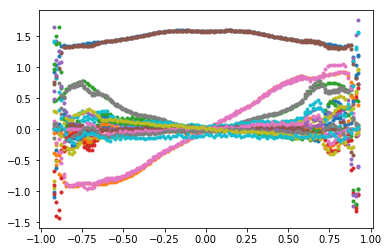

In [207]:
import os
import tables
from scipy.optimize import curve_fit

def odd_func(x, a, b, c, d, e):
    return a * x**1 + b * x**3 + c * x**5 + d * x**7 + e * x**9

def even_func(x, a, b, c, d, e):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8
path = '../coeff_pe_1t_2.0MeV/'
def findfile(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')

    coeff = 'coeff' + str(order)
    mean = 'mean' + str(order)
    predict = 'predict' +str(order)
    rate = 'rate' + str(order)
    hinv = 'hinv' + str(order)
    chi = 'chi' + str(order)
    
    a = eval('np.array(h.root.'+ coeff + '[:])')
    b = eval('np.array(h.root.'+ mean + '[:])')
    c = eval('np.array(h.root.'+ predict + '[:])')
    try:
        d = eval('h.root.'+ rate + '[:])')
    except:
        d = np.array(0)
    e = eval('np.array(h.root.'+ hinv + '[:])')
    f = eval('np.array(h.root.'+ chi + '[:])')
    
    data.append(np.array(np.array((a,b,c,d,e,f))))
    return data


ra = np.arange(+0.601, -0.60, -0.01)

for order in np.arange(5,20,5):
    coeff = []
    mean = []
    predict = []
    rate = []
    hinv = []
    chi = []
    for radius in ra:
        str_radius = '%+.2f' % radius
        k = findfile(path, str_radius, order)
        k.append(np.array(radius))
        coeff = np.hstack((coeff,np.array(k[0][0])))
        mean = np.hstack((mean,np.array(k[0][1])))
        predict = np.hstack((predict,np.array(k[0][2][:,0])))
        #rate = np.hstack((rate,np.array(k[0][3])))
        #hinv = np.hstack((hinv,np.array(k[0][4])))
        chi = np.hstack((chi,np.array(k[0][5])))
    #print(np.array(h))
    #h1 = np.reshape(h,(-1,np.size(ra)),order='F')
    #print(h1)
    #plt.plot(np.transpose(h1))
    coeff = np.reshape(coeff,(-1,np.size(ra)),order='F')
    mean = np.reshape(mean,(-1,np.size(ra)),order='F')
    predict = np.reshape(predict,(-1,np.size(ra)),order='F')
    chi = np.reshape(chi,(-1,np.size(ra)),order='F')
    '''
    plt.plot(ra, np.transpose(chi))
    plt.title(r'order = %d,$\chi^2$/ndf of 30 PMT on different radius' % order)
    plt.xlabel('radius/m')
    plt.ylabel(r'$\chi^2$/ndf')
    plt.show()
    '''

    N_max = np.size(coeff[:,0])
    bd_1 = 0.75
    bd_2l = 0.50 
    bd_2r = 0.80
    bd_3 = 0.7
    
    fit_max = 5
    k1 = np.zeros((N_max+1, fit_max))
    k2 = np.zeros((N_max+1, fit_max))
    for i in np.arange(np.size(coeff[:,0])):
        data = np.nan_to_num(coeff[i,:])
        x = ra/0.65
        plt.plot(x, data,'.')
        '''
        a = np.polyfit(x, data, 8)
        print(a)
        b = np.poly1d(a)
        c = b(x)
        plt.plot(x,c)'''
        index1 = (x<=bd_1) & (x>=-bd_1) & (x!=0)

        if(i%2==1):
            popt1, pcov = curve_fit(odd_func, x[index1], data[index1])
            output1 = odd_func(x[index1], *popt1)
        else:
            popt1, pcov = curve_fit(even_func, x[index1], data[index1])
            output1 = even_func(x[index1], *popt1)

        index2 = (np.abs(x)<=bd_2r) & (np.abs(x)>=bd_2l)
        if(i%2==1):
            popt2, pcov = curve_fit(odd_func, x[index2], data[index2])
            output2 = odd_func(x[index2], *popt2)
            #plt.plot(x[index1], odd_func(x[index1], *popt), 'r-')
        else:
            popt2, pcov = curve_fit(even_func, x[index2], data[index2])
            #plt.plot(x[index1], even_func(x[index1], *popt), 'r-')
            output2 = even_func(x[index2], *popt2)

        index3 = (x >= bd_3) | (x <= - bd_3)
        if(i%2==1):
            popt3, pcov = curve_fit(odd_func, x[index3], data[index3])
            output3 = odd_func(x[index3], *popt3)
        else:
            popt3, pcov = curve_fit(even_func, x[index3], data[index3])
            output3 = even_func(x[index3], *popt3)

        x_total = np.hstack((x[index1],x[index2],x[index3]))
        y_total = np.hstack((output1,output2,output3))
        x_total = np.hstack((x[index1],x[index3]))
        y_total = np.hstack((output1,output3))
        index = np.argsort(x_total)
        '''
        plt.plot(x_total[index],y_total[index])
        #plt.text(0,0.5,r'fit: z^1=%2.3f, z^3=%2.3f, z^5=%2.3f, z^7=%2.3f, z^9=%2.3f' % tuple(popt))
        plt.xlabel('Radius/m')
        plt.ylabel('Coefficients')
        plt.title(str(i)+'-th Legendre coeff')
        plt.legend(['raw','fit'])
        plt.show()
        '''
        print(len(k1[0,:]))
        print(len(popt1))
        k1[i,:] = popt1
        k2[i,:] = popt3
        #print(popt1, popt3)

In [194]:
coeff[:,0].shape

(10,)

array([ 6.33570793,  0.24437095,  1.93206971,  2.87736929,  2.43544078,
        2.27464699,  2.26294365,  1.91693169, 20.9492431 ,  4.5309757 ,
        3.37425264,  2.80155197,  3.06525887,  2.2041725 ,  2.16664546,
        1.91133444,  6.43531357,  3.40045796,  4.45706653,  3.43862104,
        3.06258746,  2.34982827,  2.20697112,  2.25187635,  0.25085867,
        1.89492431,  3.47360387,  2.17465971,  2.39129882,  2.44014756])

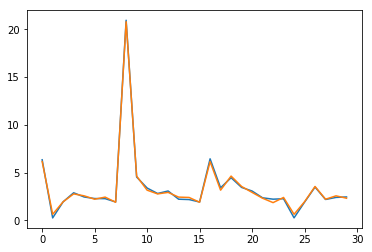

In [62]:
plt.plot(mean[:,1])
plt.plot(predict[:,1])

mean[:,1]

In [149]:
f = open(r'../PMT_1t.txt')
line = f.readline()
data_list = []
while line:
    num = list(map(float,line.split()))
    data_list.append(num)
    line = f.readline()
f.close()
PMT_pos = np.array(data_list)

filename = '/mnt/stage/douwei/Simulation/1t_root/2MeV_015/1t_+0.60.h5'
#filename = path + '1t_' + radius + '.h5'
# read files by table
h1 = tables.open_file(filename,'r')
print(filename)
truthtable = h1.root.GroundTruth
EventID = truthtable[:]['EventID']
ChannelID = truthtable[:]['ChannelID']
h1.close()

# read file series

try:
    for j in np.arange(1,20,1):
        filename = Energy + '/calib' + radius + '_' + str(j)+ '.h5'           
        h1 = tables.open_file(filename,'r')
        print(filename)
        truthtable = h1.root.GroundTruth

        EventID_tmp = truthtable[:]['EventID']
        ChannelID_tmp = truthtable[:]['ChannelID']
        EventID = np.hstack((EventID, EventID_tmp))
        ChannelID = np.hstack((ChannelID, ChannelID_tmp))

        h1.close()
except:
    j = j - 1

total_pe = np.zeros((np.size(PMT_pos[:,0]),max(EventID)))
for k in np.arange(1, max(EventID)):
    event_pe = np.zeros(np.size(PMT_pos[:,0]))
    hit = ChannelID[EventID == k]
    tabulate = np.bincount(hit)
    event_pe[0:np.size(tabulate)] = tabulate
    total_pe[:,k-1] = event_pe
    
for seq in np.arange(30):
    bin_num = np.int(np.max(total_pe[seq]) - np.min(total_pe[seq]))
    a,b = np.histogram(total_pe[seq],bins=bin_num-1)
    predict = np.mean(total_pe[seq])
    print(2*np.sum(- total_pe[seq] + predict + np.nan_to_num(total_pe[seq]*np.log(total_pe[seq]/predict)))/(np.max(EventID)-30))

/mnt/stage/douwei/Simulation/1t_root/2MeV_015/1t_+0.60.h5
1.1330780402550036
0.6903843409931572
1.120351891753739
1.0304328199088795
1.0435291011686938
1.0425420313551097
1.050491642794923
1.0698135601049659
1.0902823755672046
1.0847268159852625
1.0816941390327648
1.0459003635626907
1.0231253636895687
1.0114742744327618
1.042595439390585
1.0681948588045647
1.0923427936100791
1.0870492188484329
1.0823667767645124
1.0701585684669814
1.0349342098816168
1.0348388168312646
1.0177019892066497
1.0194340379212132
0.6805579276413035
1.127539458638215
1.0381846490832332
1.0574466453059455
0.9850342576118178
1.0530064338640737


/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in multiply


In [148]:
np.mean(total_pe,axis=1)

array([ 4.37511641,  0.18569566,  0.98007078,  2.85267275,  2.44682436,
        2.27528404,  2.26205997,  1.9390948 , 18.9811883 ,  4.10486124,
        2.30508475,  2.72899981,  2.87558205,  2.18439188,  2.14397467,
        1.86291674,  4.47532129,  2.29614453,  3.98603092,  3.7621531 ,
        2.88042466,  2.23766064,  2.31756379,  2.28943937,  0.17545167,
        0.98044329,  3.73123487,  2.19277333,  2.41627864,  2.30787856])

In [140]:
for seq in np.arange(30):
    bin_num = np.int(np.max(total_pe[seq]) - np.min(total_pe[seq]))
    a,b = np.histogram(total_pe[seq],bins=bin_num-1)
    predict = np.mean(total_pe[seq])
    print(2*np.sum(- total_pe[seq] + predict + np.nan_to_num(total_pe[seq]*np.log(total_pe[seq]/predict)))/(np.max(EventID)-30))

1.1112568706427859
0.8101913203796073
1.2141203022402645
1.0855614402364642
1.1484088035466833
1.1387655586356993
1.1233383321359713
1.1564518391916612
1.1286103503877234
1.0311873195893744
1.1107640543633186
1.0836637389713386
1.096762258984009
1.1262577799085867
1.145638065921936
1.1350132914566906
1.1514732352044994
1.1315931296648303
1.076191913676708
1.0808848737228978
1.1188551797965467
1.125489904513379
1.1591167399725353
1.1651865985235033
0.8124449650906643
1.2055425824604011
1.1003387397000204
1.118588532278447
1.0956050823788894
1.130424561970126


/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [167]:
coeff[2,:].shape

(121,)

In [ ]:
import os
import tables
from scipy.optimize import curve_fit

def odd_func(x, a, b, c, d, e):
    return a * x**1 + b * x**3 + c * x**5 + d * x**7 + e * x**9

def even_func(x, a, b, c, d, e):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8
path = '../coeff_pe_1t_2.0MeV/'
def findfile(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')

    coeff = 'coeff' + str(order)
    mean = 'mean' + str(order)
    predict = 'predict' +str(order)
    rate = 'rate' + str(order)
    hinv = 'hinv' + str(order)
    chi = 'chi' + str(order)
    
    a = eval('np.array(h.root.'+ coeff + '[:])')
    b = eval('np.array(h.root.'+ mean + '[:])')
    c = eval('np.array(h.root.'+ predict + '[:])')
    try:
        d = eval('h.root.'+ rate + '[:])')
    except:
        d = np.array(0)
    e = eval('np.array(h.root.'+ hinv + '[:])')
    f = eval('np.array(h.root.'+ chi + '[:])')
    
    data.append(np.array(np.array((a,b,c,d,e,f))))
    return data


ra = np.arange(+0.601, -0.60, -0.01)

for order in np.arange(5,20,5):
    coeff = []
    mean = []
    predict = []
    rate = []
    hinv = []
    chi = []
    for radius in ra:
        str_radius = '%+.2f' % radius
        k = findfile(path, str_radius, order)
        k.append(np.array(radius))
        coeff = np.hstack((coeff,np.array(k[0][0])))
        mean = np.hstack((mean,np.array(k[0][1])))
        predict = np.hstack((predict,np.array(k[0][2][:,0])))
        #rate = np.hstack((rate,np.array(k[0][3])))
        #hinv = np.hstack((hinv,np.array(k[0][4])))
        chi = np.hstack((chi,np.array(k[0][5])))
    #print(np.array(h))
    #h1 = np.reshape(h,(-1,np.size(ra)),order='F')
    #print(h1)
    #plt.plot(np.transpose(h1))
    coeff = np.reshape(coeff,(-1,np.size(ra)),order='F')
    mean = np.reshape(mean,(-1,np.size(ra)),order='F')
    predict = np.reshape(predict,(-1,np.size(ra)),order='F')
    chi = np.reshape(chi,(-1,np.size(ra)),order='F')
    '''
    plt.plot(ra, np.transpose(chi))
    plt.title(r'order = %d,$\chi^2$/ndf of 30 PMT on different radius' % order)
    plt.xlabel('radius/m')
    plt.ylabel(r'$\chi^2$/ndf')
    plt.show()
    '''

    N_max = np.size(coeff[:,0])
    bd_1 = 0.75
    bd_2l = 0.50 
    bd_2r = 0.80
    bd_3 = 0.7
    
    fit_max = 5
    k1 = np.zeros((N_max+1, fit_max))
    k2 = np.zeros((N_max+1, fit_max))
    for i in np.arange(np.size(coeff[:,0])):
        data = np.nan_to_num(coeff[i,:])
        x = ra/0.65
        plt.plot(x, data,'.')
        '''
        a = np.polyfit(x, data, 8)
        print(a)
        b = np.poly1d(a)
        c = b(x)
        plt.plot(x,c)'''
        index1 = (x<=bd_1) & (x>=-bd_1) & (x!=0)

        if(i%2==1):
            popt1, pcov = curve_fit(odd_func, x[index1], data[index1])
            output1 = odd_func(x[index1], *popt1)
        else:
            popt1, pcov = curve_fit(even_func, x[index1], data[index1])
            output1 = even_func(x[index1], *popt1)

        index2 = (np.abs(x)<=bd_2r) & (np.abs(x)>=bd_2l)
        if(i%2==1):
            popt2, pcov = curve_fit(odd_func, x[index2], data[index2])
            output2 = odd_func(x[index2], *popt2)
            #plt.plot(x[index1], odd_func(x[index1], *popt), 'r-')
        else:
            popt2, pcov = curve_fit(even_func, x[index2], data[index2])
            #plt.plot(x[index1], even_func(x[index1], *popt), 'r-')
            output2 = even_func(x[index2], *popt2)

        index3 = (x >= bd_3) | (x <= - bd_3)
        if(i%2==1):
            popt3, pcov = curve_fit(odd_func, x[index3], data[index3])
            output3 = odd_func(x[index3], *popt3)
        else:
            popt3, pcov = curve_fit(even_func, x[index3], data[index3])
            output3 = even_func(x[index3], *popt3)

        x_total = np.hstack((x[index1],x[index2],x[index3]))
        y_total = np.hstack((output1,output2,output3))
        x_total = np.hstack((x[index1],x[index3]))
        y_total = np.hstack((output1,output3))
        index = np.argsort(x_total)

        plt.plot(x_total[index],y_total[index])
        #plt.text(0,0.5,r'fit: z^1=%2.3f, z^3=%2.3f, z^5=%2.3f, z^7=%2.3f, z^9=%2.3f' % tuple(popt))
        plt.xlabel('Radius/m')
        plt.ylabel('Coefficients')
        plt.title(str(i)+'-th Legendre coeff')
        plt.legend(['raw','fit'])
        plt.show()

        k1[i,:] = popt1
        k2[i,:] = popt3
        #print(popt1, popt3)